

Import All required libraries and Unzip all files


In [ ]:
import pandas as pd

In [ ]:
file = "http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz"

In [ ]:
!pip install wget
import wget
wget.download(file)

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=a386f28f06e8c3a485b51ede74b5fc1e61817dad675ba3caadc7c24f96ab9471
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


'review_polarity.tar.gz'

In [ ]:
import tarfile

tf = tarfile.open("review_polarity.tar.gz")

In [ ]:
tf.extractall(r"/content/C:\Users\16197\Documents\NLP midterm")

In [ ]:
import tarfile
import os
import pandas as pd
import string
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
punctuations= string.punctuation
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
stopword_list = stopwords.words("english")
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,f1_score,precision_recall_fscore_support,log_loss
from sklearn.linear_model import Lasso, SGDClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in '/content': ['.config', 'C:\\Users\\16197\\Documents\\NLP midterm', 'review_polarity.tar.gz', 'sample_data']


In [ ]:
file = open("/content/review_polarity.tar.gz")

Loading Dataset into Dataframe and Data Preprocessing.




In [ ]:
neg_location=r'/content/C:\Users\16197\Documents\NLP midterm/txt_sentoken/neg'
pos_location=r'/content/C:\Users\16197\Documents\NLP midterm/txt_sentoken/pos'


def create_dataframe(data_dir,string):
  labels, cleaned_documents = [], []
  for doc_name in os.listdir(data_dir):
    file_path = data_dir + '/' + doc_name 
    with open(file_path, encoding='utf8', errors='ignore') as f:
      doc = f.read()
    cleaned_documents.append(doc)
    labels.append(string)
  df = pd.DataFrame({'text': cleaned_documents,'label':labels})
  return df

def clean_text(text,stop_words=True):
    cleaned_text = text.lower()
    cleaned_text = "".join(c for c in cleaned_text if c not in punctuations)
    words = cleaned_text.split()
    if stop_words==True:
      words = [w for w in words if w not in stopword_list]
    words = [lem.lemmatize(word, "v") for word in words]
    words = [lem.lemmatize(word, "n") for word in words]
    cleaned_text = " ".join(words)
    return cleaned_text

df1 = create_dataframe(neg_location,'neg')
df2 = create_dataframe(pos_location,'pos')
df = pd.concat([df1,df2],axis=0)
df['text'] = df['text'].apply(clean_text,stop_words=False)
df

,text,label
0,in the interest of be generous i want to start...,neg
1,humanity quest for knowledge never end so a te...,neg
2,man this be one wierd movie similar to conspir...,neg
3,in the mid1980s follow the splendid debut in h...,neg
4,star armand assante mike hammer barbara carrer...,neg
...,...,...
995,take a few tip from the pulp fiction school of...,pos
996,plot a young recruit get pluck out of nowhere ...,pos
997,the relax dude rid a roller coaster the big le...,pos
998,matthew broderick and high school comedy the t...,pos


In [ ]:
df['text'] = df['text'].apply(clean_text)
words = [word for i in df['text'] for word in i.split()]
print(len(words))

706872


Top 10000 Features List

In [ ]:
from collections import Counter  
# Pass the split_it list to instance of Counter class.
Counter = Counter(words)
  
# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = Counter.most_common(10000)
  
print(most_occur)

[('film', 11106), ('movie', 6856), ('one', 5757), ('make', 4178), ('character', 3853), ('like', 3832), ('get', 3728), ('see', 3107), ('go', 2985), ('time', 2891), ('scene', 2638), ('even', 2602), ('play', 2339), ('good', 2338), ('story', 2320), ('take', 2188), ('would', 2042), ('much', 2024), ('also', 1965), ('come', 1951), ('know', 1936), ('give', 1922), ('way', 1855), ('seem', 1834), ('look', 1826), ('two', 1825), ('end', 1824), ('first', 1769), ('well', 1754), ('work', 1702), ('thing', 1651), ('find', 1604), ('say', 1583), ('think', 1581), ('really', 1563), ('year', 1562), ('plot', 1553), ('little', 1494), ('life', 1485), ('show', 1469), ('people', 1461), ('could', 1395), ('bad', 1374), ('never', 1364), ('love', 1353), ('man', 1352), ('try', 1339), ('performance', 1315), ('best', 1304), ('star', 1298), ('new', 1277), ('many', 1268), ('doesnt', 1267), ('become', 1261), ('want', 1231), ('actor', 1229), ('director', 1213), ('dont', 1210), ('watch', 1203), ('u', 1189), ('action', 1166),

In [ ]:
mostfrequentlist=', '.join([i[0] for i in most_occur])
mostfrequentlist

'film, movie, one, make, character, like, get, see, go, time, scene, even, play, good, story, take, would, much, also, come, know, give, way, seem, look, two, end, first, well, work, thing, find, say, think, really, year, plot, little, life, show, people, could, bad, never, love, man, try, performance, best, star, new, many, doesnt, become, want, actor, director, dont, watch, u, action, use, role, great, another, act, audience, back, something, still, world, turn, interest, leave, however, feel, big, day, set, every, begin, though, tell, live, better, part, cast, enough, guy, around, comedy, point, last, isnt, run, real, may, fact, actually, script, funny, name, write, woman, right, lot, almost, effect, nothing, john, although, friend, place, thats, long, since, start, moment, minute, old, young, ever, kill, line, shoot, happen, lead, screen, original, call, help, keep, without, family, problem, bite, picture, least, bring, open, quite, sequence, girl, need, away, course, cant, lose, t

Training Dataset Into Training And Testing Set in 80:20

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.preprocessing import LabelEncoder
def get_feature_list(x,y,pca=0):
  X=df['text']
  y=df['label']
  count_vect = CountVectorizer()
  X = count_vect.fit_transform(X)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.preprocessing import LabelEncoder
def get_feature_list(x,y,pca=0):
  x=df['text']
  y=df['label']
  count_vect = CountVectorizer()
  x = count_vect.fit_transform(x)

  tfidf_transformer1 = TfidfVectorizer(max_features=10000)
  x1= tfidf_transformer1.fit_transform(df['text'])
  feature_array = np.array(tfidf_transformer1.get_feature_names())
  tfidf_transformer = TfidfTransformer()
  x= tfidf_transformer.fit_transform(x)
  l=LabelEncoder()
  y=l.fit_transform(y)
  if pca !=0:
    pcas = TruncatedSVD(pca).fit(x1.toarray())
    x1 = pcas.transform(x1.toarray())
  train_x,test_x,train_y,test_y = train_test_split(x1,y, random_state = 56,test_size=0.2,stratify=y)
  #train_x=train_x.toarray()
  #test_x=test_x.toarray()
  return train_x,test_x,train_y,test_y,feature_array
x=df['text']
y=df['label']
train_x,test_x,train_y,test_y,feature_array = get_feature_list(x,y,pca=14)
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((1600, 14), (400, 14), (1600,), (400,))

In [ ]:
x=df['text']
y=df['label']
tfidf_transformer1 = TfidfVectorizer(max_df=0.95, min_df=2, max_features=10, stop_words='english')
x1= tfidf_transformer1.fit_transform(df['text'])
dict(zip(tfidf_transformer1.get_feature_names(), x1.toarray()[0]))

{'character': 0.3680276481864229,
 'film': 0.0,
 'good': 0.08541408864442324,
 'like': 0.28242942983530395,
 'make': 0.13573565951424177,
 'movie': 0.5942221330703017,
 'play': 0.4179204814247462,
 'scene': 0.42493180656359714,
 'story': 0.0,
 'time': 0.22526655117047195}

In [ ]:
def get_tfidf_top_features(corpus,n_top=10):
  tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=10000, stop_words='english')
  tfidf = tfidf_vectorizer.fit_transform(corpus)
  importance_values = np.argsort(np.asarray(tfidf.sum(axis=0)).ravel())[::-1]
  tfidf_feature_names = np.array(tfidf_vectorizer.get_feature_names())
  values = [np.mean(i) for i in tfidf.toarray()[::-1]]
  top_features = tfidf_feature_names[importance_values[:n_top]]
  return top_features,importance_values,values

a,importance,k=get_tfidf_top_features(x,n_top=10)
sorted(dict(zip(a, k)).items(), key=lambda x: x[1],reverse=True) 

[('play', 0.0013356421175741702),
 ('make', 0.0013313431178400643),
 ('character', 0.0013207426999228913),
 ('like', 0.0011754075190385717),
 ('film', 0.0011665730238796816),
 ('movie', 0.0011439000091270266),
 ('time', 0.0011046258149227885),
 ('story', 0.0010545968853260498),
 ('scene', 0.0009529330545443459),
 ('good', 0.0007448469050236086)]

Defining Perceptron and calculating the Loss Function.

In [ ]:
def perceptronloss(y_true,y_pred,w):
  errors = []
  for t in range(len(y_true)):
          total_error = 0
          for i, x in enumerate(y_true):
              if np.mean((np.dot(y_true[i], w)*y_pred[i])) <= 0:
                  total_error += (np.dot(y_true[i], w)*y_pred[i])
          errors.append(total_error*-1)
  return np.mean(errors)
import math
def gradient(x, y, W):
  y = y.reshape(-1, 1)
  return ( x * (y - sigmoid(x @ W)) ).T
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        if sigmoid(z) >= 0.5:
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
def sigmoid(z):
  return 1/(1 + np.exp(-z))
def confusion_matrixs(y, yp):
 
  k = sorted(list(set(y)))
  df = pd.DataFrame(index=k, columns=k)
  df.fillna(0, inplace=True)
  for i, j in zip(y, yp):
    df.loc[i, j] += 1
  sns.heatmap(df, annot=True)
  plt.plot()

train acc: 0.824375
The acc of the model is : 78.0 %
Confusion Matrix:
 [[179  21]
 [ 67 133]]
Precision =  0.8636 
Recall =  0.665 
F-Score =  0.7514


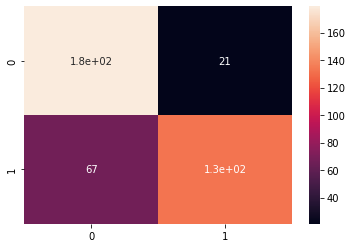

In [ ]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,f1_score,precision_recall_fscore_support,log_loss
from sklearn.linear_model import Lasso, SGDClassifier
from sklearn.feature_selection import SelectFromModel
train_x,test_x,train_y,test_y,feature_array = get_feature_list(x,y,pca=300)
X_test,X_train,y_train,y_test=test_x,train_x,train_y,test_y
sgd = SGDClassifier(eta0=0.0001, alpha=0.001, loss='hinge',random_state=15, penalty='elasticnet', tol=1e-3,learning_rate='adaptive')
sgd.fit(X_train, y_train)
print(f'train acc: {sgd.score(X_train, y_train)}')
acc = accuracy_score(y_test, sgd.predict(X_test))
conf_mat = confusion_matrix(y_test,sgd.predict(X_test))
c=np.array([[i] for i in np.append(np.array([[i] for i in sgd.coef_[0]]),[0])])
print("The acc of the model is :", round(acc,3)*100,"%")
print("Confusion Matrix:\n",conf_mat)
precision, recall, fscore, support = precision_recall_fscore_support(y_test,sgd.predict(X_test), average='binary')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))
confusion_matrixs(y_test, sgd.predict(X_test))

In [ ]:
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0,batch_size=1):
  loss_of_train, loss_of_test,f1 = [], [], []
  X_train = np.c_[np.ones(X_train.shape[0]), X_train]
  X_test = np.c_[np.ones(X_test.shape[0]), X_test]
  weights = np.zeros((X_train.shape[1], 1))
  loss_of_train.append(perceptronloss(y_train, sigmoid(X_train @ weights)))
  for _ in tqdm(range(epochs)):
    r = np.random.randint(0,len(X_train),batch_size)
    random_x, random_y = X_train[r], y_train[r]
    weights += eta0 * ( random_x * (random_y.reshape(-1, 1) - sigmoid(random_x @ weights)) ).T
    weights[1:] -= eta0 * alpha * np.sqrt(weights[1:] ** 2) / X_train.shape[0]
    loss_of_train.append(perceptronloss(y_train, sigmoid(X_train @ weights)))
    loss_of_test.append(perceptronloss(y_test, sigmoid(X_test @ weights)))
    f1.append(f1_score(y_test, sigmoid(X_test @ weights) > 0.5))
  return weights,weights[1:] ,loss_of_train, loss_of_test,f1
from tqdm import tqdm
alpha=0.01
eta0=0.0001
N=len(train_x)
epochs=400
w,b,loss_of_train, loss_of_test,f1=train(train_x,train_y,test_x,test_y,epochs,alpha,eta0,batch_size=1)
plt.plot(np.log(range(1, epochs + 2)), loss_of_train)
plt.plot(np.log(range(1, epochs+1)), loss_of_test, '-.', alpha=0.75)
plt.title('train loss vs test loss')
plt.xlabel('log epochs')
plt.ylabel('loss')
plt.legend(['train loss','test loss'], loc='upper right')
plt.show()
plt.plot(np.log(range(1, epochs+1)), sorted(f1,reverse=False))
plt.title('F1 Score vs test loss')
plt.xlabel('log epochs')
plt.ylabel('F1 Score')
plt.legend(['F1 Score'], loc='upper right')
plt.show()
X_test,X_train,y_train,y_test=test_x,train_x,train_y,test_y
p = sigmoid(X_test @ c[:-1])
print(f'train accuracy: {accuracy_score(test_y, p >= 0.5)}')
print(f'train log loss: {log_loss(test_y, p)}')
print(accuracy_score(test_y, p >= 0.5))
print(classification_report(test_y, p >= 0.5))
print(confusion_matrix(test_y, p >= 0.5))
precision, recall, fscore, support = precision_recall_fscore_support(test_y, p >= 0.5, average='binary')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))
confusion_matrixs(y_test, sgd.predict(X_test))

TypeError: ignored

100%|██████████| 400/400 [00:07<00:00, 56.85it/s]


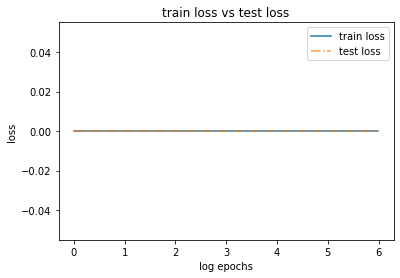

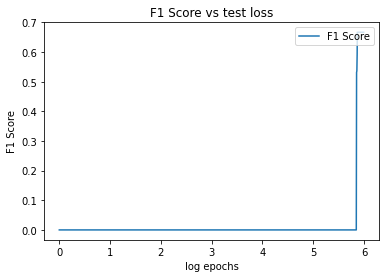

ValueError: ignored

In [ ]:
def perceptronloss(y_true,y_pred):
  loss=0
  for i in range(len(y_true)):
    loss+= y_true[i]*y_pred[i]
  loss=max(0,-loss)
  return loss
import math
def gradient(x, y, W):
  y = y.reshape(-1, 1)
  return ( x * (y - sigmoid(x @ W)) ).T
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        if sigmoid(z) >= 0.5:
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
def sigmoid(z):
  return 1/(1 + np.exp(-z))
def confusion_matrixs(y, yp):
  #k = sorted(y.unique())
  k = sorted(list(set(y)))
  df = pd.DataFrame(index=k, columns=k)
  df.fillna(0, inplace=True)
  for i, j in zip(y, yp):
    df.loc[i, j] += 1
  sns.heatmap(df, annot=True)
  plt.plot()
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0,batch_size=1):
  loss_of_train, loss_of_test,f1 = [], [], []
  X_train = np.c_[np.ones(X_train.shape[0]), X_train]
  X_test = np.c_[np.ones(X_test.shape[0]), X_test]
  weights = np.zeros((X_train.shape[1], 1))
  loss_of_train.append(perceptronloss(y_train, sigmoid(X_train @ weights)))
  for _ in tqdm(range(epochs)):
    r = np.random.randint(0,len(X_train),batch_size)
    random_x, random_y = X_train[r], y_train[r]
    weights += eta0 * ( random_x * (random_y.reshape(-1, 1) - sigmoid(random_x @ weights)) ).T
    weights[1:] -= eta0 * alpha * np.sqrt(weights[1:] ** 2) / X_train.shape[0]
    loss_of_train.append(perceptronloss(y_train, sigmoid(X_train @ weights)))
    loss_of_test.append(perceptronloss(y_test, sigmoid(X_test @ weights)))
    f1.append(f1_score(y_test, sigmoid(X_test @ weights) > 0.5))
  return weights,weights[1:] ,loss_of_train, loss_of_test,f1
from tqdm import tqdm
alpha=0.01
eta0=0.0001
N=len(train_x)
epochs=400
w,b,loss_of_train, loss_of_test,f1=train(train_x,train_y,test_x,test_y,epochs,alpha,eta0,batch_size=1)
plt.plot(np.log(range(1, epochs + 2)), loss_of_train)
plt.plot(np.log(range(1, epochs+1)), loss_of_test, '-.', alpha=0.75)
plt.title('train loss vs test loss')
plt.xlabel('log epochs')
plt.ylabel('loss')
plt.legend(['train loss','test loss'], loc='upper right')
plt.show()
plt.plot(np.log(range(1, epochs+1)), sorted(f1,reverse=False))
plt.title('F1 Score vs test loss')
plt.xlabel('log epochs')
plt.ylabel('F1 Score')
plt.legend(['F1 Score'], loc='upper right')
plt.show()
X_test,X_train,y_train,y_test=test_x,train_x,train_y,test_y
p = sigmoid(X_test @ c[:-1])
print(f'train accuracy: {accuracy_score(test_y, p >= 0.5)}')
print(f'train log loss: {log_loss(test_y, p)}')
print(accuracy_score(test_y, p >= 0.5))
print(classification_report(test_y, p >= 0.5))
print(confusion_matrix(test_y, p >= 0.5))
precision, recall, fscore, support = precision_recall_fscore_support(test_y, p >= 0.5, average='binary')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))
confusion_matrixs(y_test, sgd.predict(X_test))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training acc : 0.9775
Testing acc : 0.8
              precision    recall  f1-score   support

           0       0.82      0.78      0.79       200
           1       0.79      0.82      0.80       200

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400

[[155  45]
 [ 35 165]]
Precision =  0.7857 
Recall =  0.825 
F-Score =  0.8049


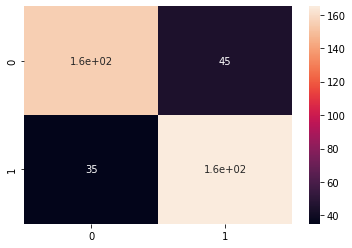

In [ ]:
from sklearn.neural_network import MLPClassifier
train_x,test_x,train_y,test_y,feature_array = get_feature_list(x,y,pca=100)
X_test,X_train,y_train,y_test=test_x,train_x,train_y,test_y
ANN_clf = MLPClassifier(hidden_layer_sizes=(50,25,2),activation='relu', solver='adam')
X_train=train_x
X_test=test_x
ANN_clf.fit(X_train,train_y)
print('Training acc :',ANN_clf.score(X_train,train_y))
print('Testing acc :',ANN_clf.score(X_test,test_y))
print(classification_report(test_y,ANN_clf.predict(X_test) ))
print(confusion_matrix(test_y, ANN_clf.predict(X_test)))
precision, recall, fscore, support = precision_recall_fscore_support(test_y, ANN_clf.predict(X_test), average='binary')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))
confusion_matrixs(y_test, ANN_clf.predict(X_test))